In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

We have no null values. We have 16 numeric column and 10 categoric columns.

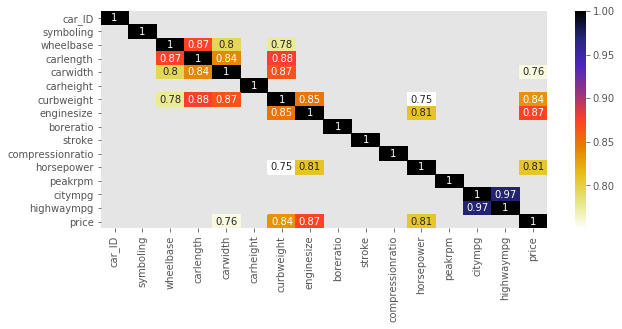

In [4]:
plt.figure(figsize = (10,4))
corr = data.corr()
corr = corr[corr > 0.75]
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r);

High corr value between price and compressionratio, enginesize, curbweight, and carwidth. We definitely want them in our model.

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can play with CarName column.

In [6]:
data['CarName'] = data['CarName'].str.split(' ', expand=True)

In [7]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are cars with wrong spelling.

In [8]:
data['CarName'] = data['CarName'].replace({'maxda' : 'mazda', 'nissan' : 'Nissan', 'porcshce' : 'porsche',
                                          'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen'})

In [9]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
data.shape

(205, 26)

Since we know the relation between numerical variables, we should check categorical values.

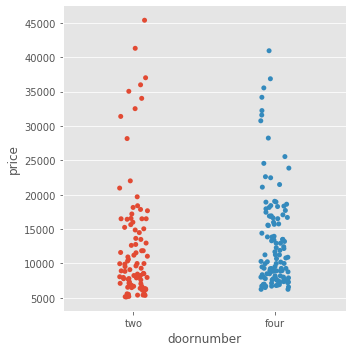

In [11]:
sns.catplot(x="doornumber", y="price", data=data); # looks like there is no specific relation between doors and prices

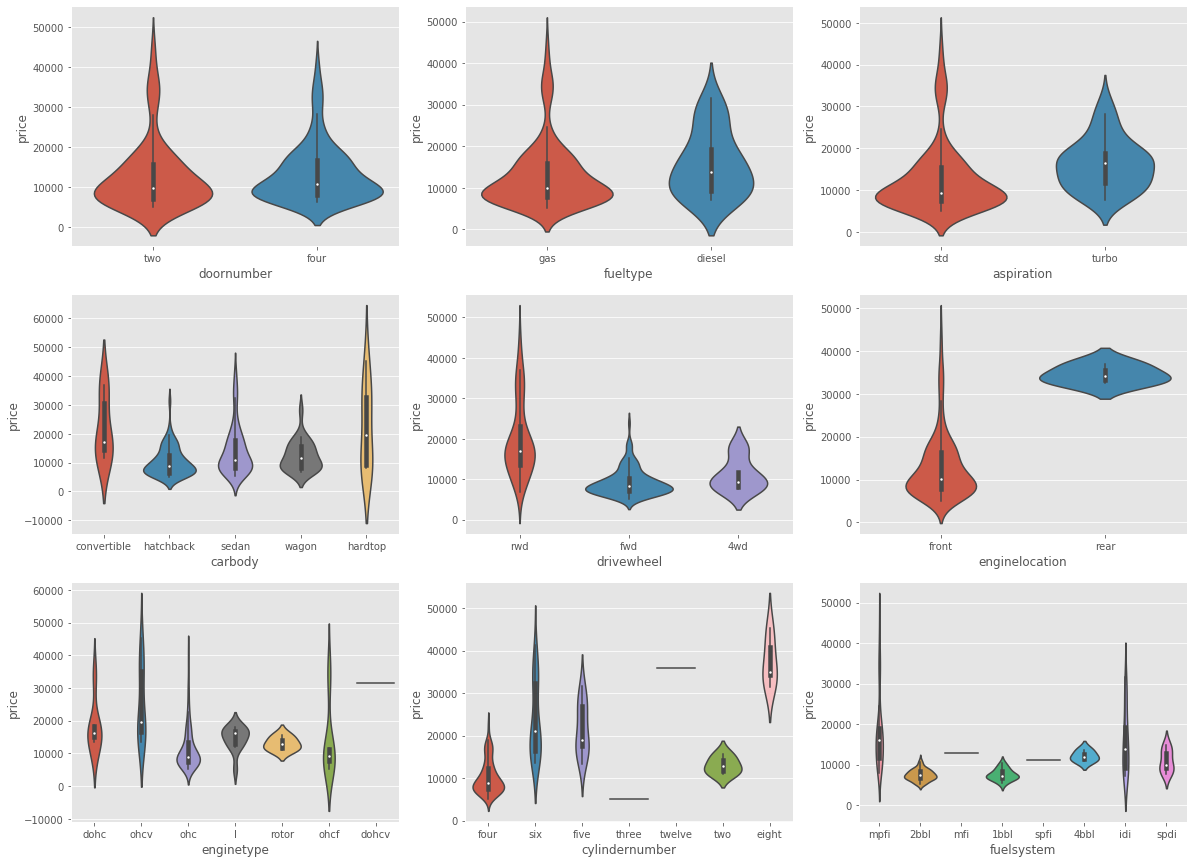

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.violinplot(x="doornumber", y="price", data=data)
plt.subplot(3, 3, 2)
sns.violinplot(x="fueltype", y="price", data=data)
plt.subplot(3, 3, 3)
sns.violinplot(x="aspiration", y="price", data=data)
plt.subplot(3, 3, 4)
sns.violinplot(x="carbody", y="price", data=data)
plt.subplot(3, 3, 5)
sns.violinplot(x="drivewheel", y="price", data=data)
plt.subplot(3, 3, 6)
sns.violinplot(x="enginelocation", y="price", data=data)
plt.subplot(3, 3, 7)
sns.violinplot(x="enginetype", y="price", data=data)
plt.subplot(3, 3, 8)
sns.violinplot(x="cylindernumber", y="price", data=data)
plt.subplot(3, 3, 9)
sns.violinplot(x="fuelsystem", y="price", data=data);

* Number of doors, aspiration, fuelsystem, carbody does not have a significant relationship with price.
* The cars with rwd as drivewheel are more expensive.
* The cars with rear as enginelocation are more expensive than cars with front as enginelocation.
* The cars with ohcv as enginetype are more expensive.
* The cars with eight cylinder are more expensive than the others.
* The cars with diesel fueltype are more expensive.

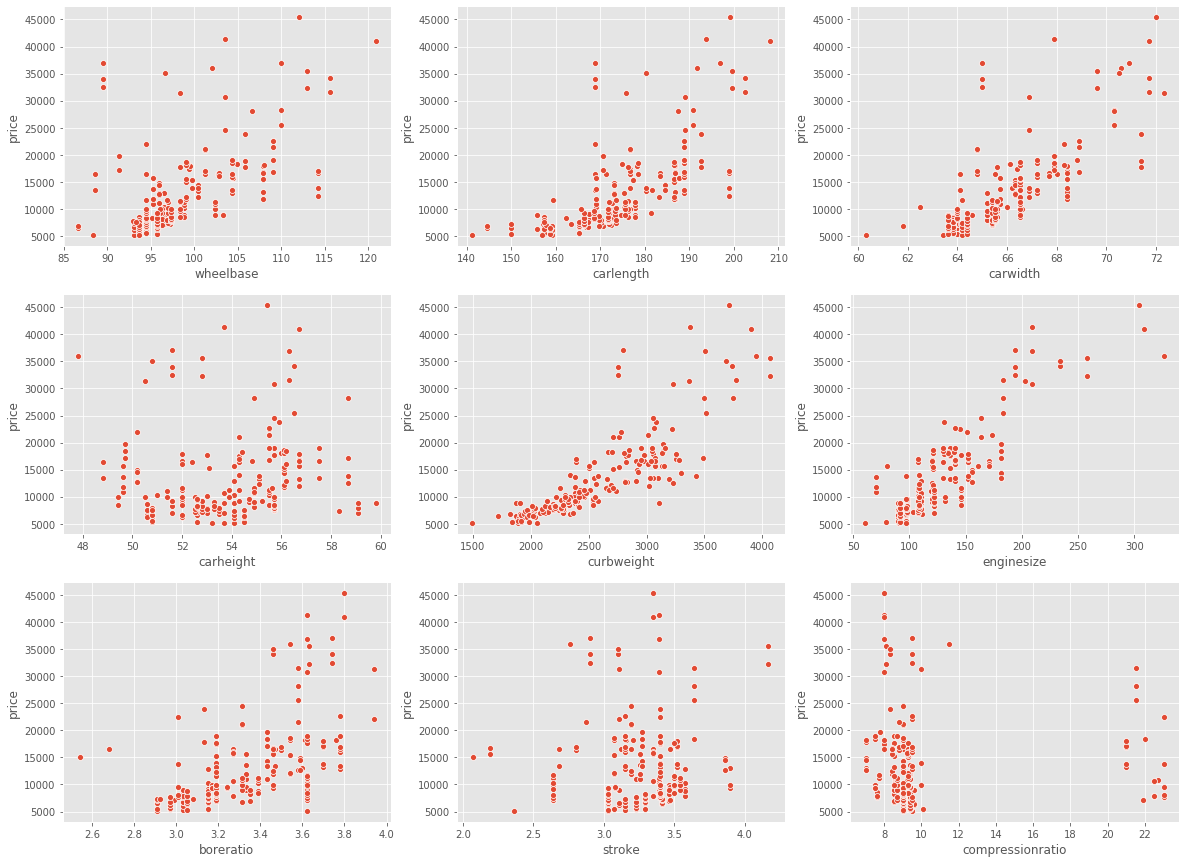

In [13]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.scatterplot(x="wheelbase", y="price", data=data)
plt.subplot(3, 3, 2)
sns.scatterplot(x="carlength", y="price", data=data)
plt.subplot(3, 3, 3)
sns.scatterplot(x="carwidth", y="price", data=data)
plt.subplot(3, 3, 4)
sns.scatterplot(x="carheight", y="price", data=data)
plt.subplot(3, 3, 5)
sns.scatterplot(x="curbweight", y="price", data=data)
plt.subplot(3, 3, 6)
sns.scatterplot(x="enginesize", y="price", data=data)
plt.subplot(3, 3, 7)
sns.scatterplot(x="boreratio", y="price", data=data)
plt.subplot(3, 3, 8)
sns.scatterplot(x="stroke", y="price", data=data)
plt.subplot(3, 3, 9)
sns.scatterplot(x="compressionratio", y="price", data=data);

We are going to take curbweight, enginesize, carlength, carwidth. 

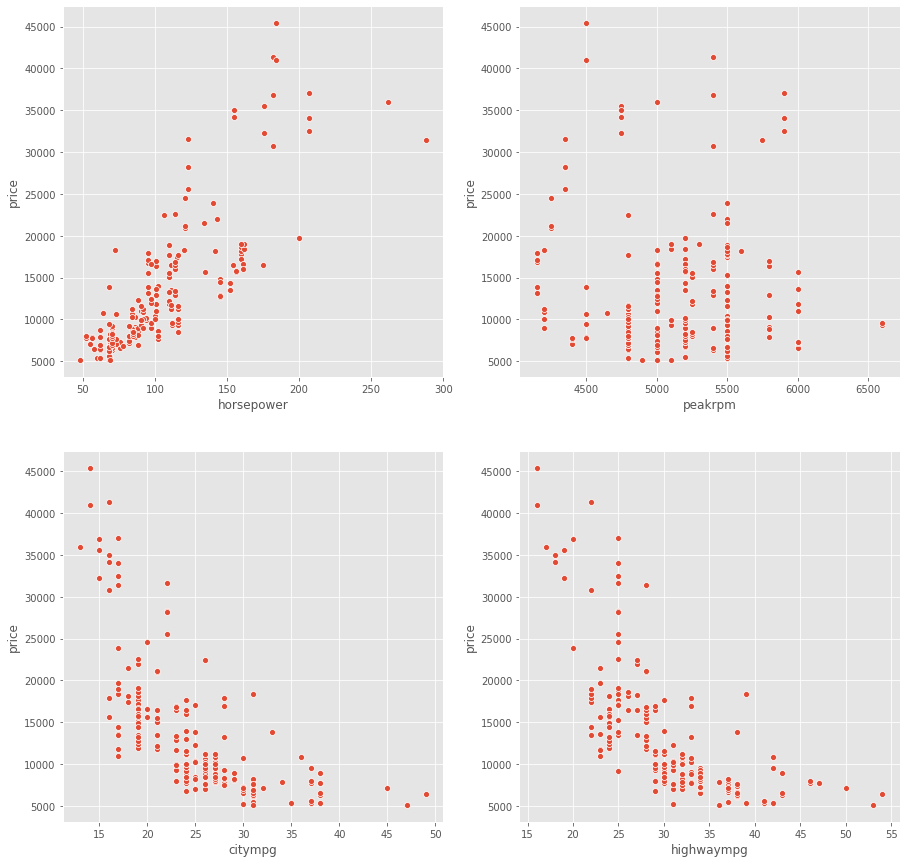

In [14]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.scatterplot(x="horsepower", y="price", data=data)
plt.subplot(2, 2, 2)
sns.scatterplot(x="peakrpm", y="price", data=data)
plt.subplot(2, 2, 3)
sns.scatterplot(x="citympg", y="price", data=data)
plt.subplot(2, 2, 4)
sns.scatterplot(x="highwaympg", y="price", data=data);

We won't use citympg and highwaympg, because of the negative relationship, and we are going to use horsepower.

Let's take a look at our targer 'price' columns distributions.

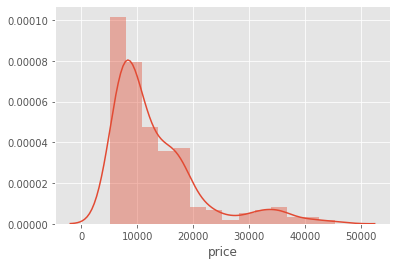

In [15]:
sns.distplot(data['price']);

Distribution is left skewed. There are outliers.

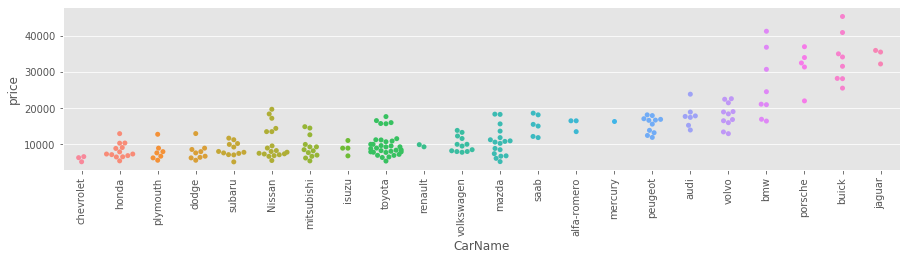

In [16]:
plt.figure(figsize=(15,3))
cars = data.groupby(['CarName'])['price'].median().sort_values()
sns.swarmplot(data['CarName'], data['price'], order=list(cars.index))
plt.xticks(rotation=90);

Car brand changing the value so we can keep this column.

Now, we will drop the unwanted columns.

In [17]:
drop = ['fuelsystem', 'doornumber', 'aspiration', 'carbody', 'wheelbase', 'carheight', 'boreratio', 'stroke',
        'compressionratio', 'peakrpm', 'citympg', 'highwaympg']

In [18]:
data.drop(drop, axis=1, inplace=True)

In [19]:
data.drop(['car_ID', 'symboling'], axis=1, inplace=True)

In [20]:
data.head()

,CarName,fueltype,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,horsepower,price
0,alfa-romero,gas,rwd,front,168.8,64.1,2548,dohc,four,130,111,13495.0
1,alfa-romero,gas,rwd,front,168.8,64.1,2548,dohc,four,130,111,16500.0
2,alfa-romero,gas,rwd,front,171.2,65.5,2823,ohcv,six,152,154,16500.0
3,audi,gas,fwd,front,176.6,66.2,2337,ohc,four,109,102,13950.0
4,audi,gas,4wd,front,176.6,66.4,2824,ohc,five,136,115,17450.0


We have to convert categoric values into numeric values. We will use get_dummy method.

In [21]:
dummies = ['CarName', 'fueltype', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

In [22]:
dummy_datas = pd.get_dummies(data[dummies], drop_first=True)
dummy_datas.shape

(205, 37)

In [23]:
data = pd.concat([data, dummy_datas], axis=1)

In [24]:
data.head()

,CarName,fueltype,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,alfa-romero,gas,rwd,front,168.8,64.1,2548,dohc,four,130,...,0,0,0,0,0,1,0,0,0,0
1,alfa-romero,gas,rwd,front,168.8,64.1,2548,dohc,four,130,...,0,0,0,0,0,1,0,0,0,0
2,alfa-romero,gas,rwd,front,171.2,65.5,2823,ohcv,six,152,...,0,0,1,0,0,0,1,0,0,0
3,audi,gas,fwd,front,176.6,66.2,2337,ohc,four,109,...,1,0,0,0,0,1,0,0,0,0
4,audi,gas,4wd,front,176.6,66.4,2824,ohc,five,136,...,1,0,0,0,1,0,0,0,0,0


In [25]:
data.drop(dummies, axis=1, inplace=True)

In [26]:
data.shape

(205, 43)

In [27]:
X = data.drop('price', axis=1)
y = data['price']

#### Now, we're going to do backward elimination.

In [28]:
import statsmodels.api as sm

In [29]:
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1).fit()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     89.10
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           4.77e-92
Time:                        15:52:52   Log-Likelihood:                -1815.4
No. Observations:                 205   AIC:                             3711.
Df Residuals:                     165   BIC:                             3844.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.873e+04   1.19e+04     -3.249      0.001   -6.23e+04   -1.52e+04
carlength               -69.3586     36.284     -1.912      0.058    -141.000       2.282
carwidth                860.3649    208.108      4.134      0.000     449.468    1271.262
curbweight                3.9620      1.372      2.888      0.004       1.253       6.671
enginesize               20.3271     15.372      1.322      0.188     -10.025      50.679
horsepower               43.6695     13.165      3.317      0.001      17.677      69.662
CarName_alfa-romero    3726.4071   1372.493      2.715      0.007    1016.495    6436.319
CarName_audi           2471.7252   1591.386      1.553      0.122    -670.379    5613.830
CarName_bmw            9297.7288   1218.061      7.633      0.000    6892.733    1.17e+04
CarName_buick          6550.6396   2091.499      3.132      0.002    2421.089    1.07e+04
CarName_chevrolet      -159.0022   1456.729     -0.109      0.913   -3035.235    2717.230
CarName_dodge          -953.9146    866.946     -1.100      0.273   -2665.653     757.824
CarName_honda          -296.4602    789.730     -0.375      0.708   -1855.739    1262.819
CarName_isuzu           990.1186   1144.964      0.865      0.388   -1270.550    3250.787
CarName_jaguar         7639.8302   2122.021      3.600      0.000    3450.016    1.18e+04
CarName_mazda           167.4253    779.602      0.215      0.830   -1371.857    1706.708
CarName_mercury       -2024.5351   2187.307     -0.926      0.356   -6343.254    2294.184
CarName_mitsubishi    -2042.9331    805.471     -2.536      0.012   -3633.292    -452.574
CarName_peugeot        1740.6016   1555.599      1.119      0.265   -1330.843    4812.046
CarName_plymouth      -1046.3023    909.436     -1.150      0.252   -2841.934     749.329
CarName_porsche        4270.2600   2176.037      1.962      0.051     -26.207    8566.727
CarName_renault       -2240.3253   1495.934     -1.498      0.136   -5193.965     713.315
CarName_saab           1843.6288   1099.268      1.677      0.095    -326.816    4014.074
CarName_subaru        -4120.0164   1214.260     -3.393      0.001   -6517.507   -1722.526
CarName_toyota         -912.1019    681.273     -1.339      0.182   -2257.238     433.034
CarName_volkswagen     -156.5682    815.069     -0.192      0.848   -1765.877    1452.741
CarName_volvo          1777.4965   1065.538      1.668      0.097    -326.350    3881.343
fueltype_gas          -1142.1122    666.417     -1.714      0.088   -2457.916     173.692
drivewheel_fwd         -188.0579    892.877     -0.211      0.833   -1950.994    1574.879
drivewheel_rwd         -217.0835   1011.460     -0.215      0.830   -2214.156    1779.989
enginelocation_rear    7512.6225   1777.736      4.226      0.000    4002.579     1.1e+04
enginetype_dohcv      -

CarName_chevrolet has higher p-value, so, we're going to drop it.

In [30]:
X_1 = X_1.drop('CarName_chevrolet', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     92.00
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           4.96e-93
Time:                        15:52:52   Log-Likelihood:                -1815.4
No. Observations:                 205   AIC:                             3709.
Df Residuals:                     166   BIC:                             3838.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.878e+04   1.19e+04     -3.266      0.001   -6.22e+04   -1.53e+04
carlength               -68.8597     35.888     -1.919      0.057    -139.715       1.996
carwidth                859.3230    207.269      4.146      0.000     450.100    1268.546
curbweight                3.9574      1.367      2.895      0.004       1.258       6.656
enginesize               20.3918     15.315      1.331      0.185      -9.846      50.629
horsepower               43.6520     13.124      3.326      0.001      17.740      69.564
CarName_alfa-romero    3741.2227   1361.693      2.747      0.007    1052.753    6429.692
CarName_audi           2491.8565   1575.950      1.581      0.116    -619.633    5603.346
CarName_bmw            9316.9657   1201.651      7.753      0.000    6944.477    1.17e+04
CarName_buick          6567.9750   2079.244      3.159      0.002    2462.804    1.07e+04
CarName_dodge          -929.4777    835.043     -1.113      0.267   -2578.151     719.196
CarName_honda          -271.8266    754.540     -0.360      0.719   -1761.558    1217.905
CarName_isuzu          1012.8995   1122.425      0.902      0.368   -1203.168    3228.967
CarName_jaguar         7653.4301   2112.045      3.624      0.000    3483.497    1.18e+04
CarName_mazda           187.6629    754.976      0.249      0.804   -1302.931    1678.256
CarName_mercury       -2001.6805   2170.772     -0.922      0.358   -6287.562    2284.201
CarName_mitsubishi    -2020.5194    776.534     -2.602      0.010   -3553.676    -487.363
CarName_peugeot        1785.5504   1495.629      1.194      0.234   -1167.357    4738.458
CarName_plymouth      -1023.5462    882.577     -1.160      0.248   -2766.070     718.977
CarName_porsche        4296.2860   2156.487      1.992      0.048      38.609    8553.963
CarName_renault       -2222.6106   1482.671     -1.499      0.136   -5149.934     704.713
CarName_saab           1859.1596   1086.771      1.711      0.089    -286.516    4004.835
CarName_subaru        -4106.5071   1204.336     -3.410      0.001   -6484.297   -1728.718
CarName_toyota         -891.7327    653.262     -1.365      0.174   -2181.506     398.041
CarName_volkswagen     -136.4026    791.488     -0.172      0.863   -1699.083    1426.277
CarName_volvo          1793.5279   1052.221      1.705      0.090    -283.933    3870.989
fueltype_gas          -1143.9613    664.216     -1.722      0.087   -2455.361     167.438
drivewheel_fwd         -189.7038    890.088     -0.213      0.831   -1947.057    1567.649
drivewheel_rwd         -219.2178   1008.257     -0.217      0.828   -2209.877    1771.442
enginelocation_rear    7504.2881   1770.802      4.238      0.000    4008.092     1.1e+04
enginetype_dohcv      -1.281e+04   3961.899     -3.235      0.001   -2.06e+04   -4992.787
enginetype_l          -

CarName_volkswagen has higher p-value, so, we're going to drop it too.

In [31]:
X_1 = X_1.drop('CarName_volkswagen', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     95.03
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           5.12e-94
Time:                        15:52:52   Log-Likelihood:                -1815.4
No. Observations:                 205   AIC:                             3707.
Df Residuals:                     167   BIC:                             3833.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.856e+04   1.18e+04     -3.276      0.001   -6.18e+04   -1.53e+04
carlength               -68.6452     35.762     -1.920      0.057    -139.249       1.958
carwidth                852.6808    203.061      4.199      0.000     451.782    1253.579
curbweight                3.9290      1.353      2.904      0.004       1.258       6.600
enginesize               20.8803     15.007      1.391      0.166      -8.747      50.508
horsepower               43.6216     13.085      3.334      0.001      17.788      69.455
CarName_alfa-romero    3772.4973   1345.620      2.804      0.006    1115.878    6429.116
CarName_audi           2599.5141   1442.642      1.802      0.073    -248.652    5447.681
CarName_bmw            9367.7251   1161.606      8.064      0.000    7074.401    1.17e+04
CarName_buick          6704.3006   1917.296      3.497      0.001    2919.038    1.05e+04
CarName_dodge          -875.7082    772.312     -1.134      0.258   -2400.461     649.045
CarName_honda          -216.6579    681.278     -0.318      0.751   -1561.686    1128.370
CarName_isuzu          1062.1369   1082.296      0.981      0.328   -1074.608    3198.882
CarName_jaguar         7705.5948   2084.162      3.697      0.000    3590.895    1.18e+04
CarName_mazda           248.7175    664.753      0.374      0.709   -1063.685    1561.120
CarName_mercury       -1922.9693   2116.007     -0.909      0.365   -6100.540    2254.602
CarName_mitsubishi    -1961.5856    695.154     -2.822      0.005   -3334.008    -589.163
CarName_peugeot        1795.7465   1490.111      1.205      0.230   -1146.136    4737.629
CarName_plymouth       -970.1006    823.893     -1.177      0.241   -2596.689     656.488
CarName_porsche        4368.9315   2108.734      2.072      0.040     205.719    8532.144
CarName_renault       -2160.6570   1434.245     -1.506      0.134   -4992.245     670.931
CarName_saab           1930.7286   1001.374      1.928      0.056     -46.255    3907.712
CarName_subaru        -4054.7030   1162.825     -3.487      0.001   -6350.435   -1758.971
CarName_toyota         -834.9247    562.357     -1.485      0.140   -1945.169     275.320
CarName_volvo          1867.6916    957.402      1.951      0.053     -22.479    3757.863
fueltype_gas          -1127.3808    655.299     -1.720      0.087   -2421.119     166.357
drivewheel_fwd         -195.8190    886.793     -0.221      0.826   -1946.589    1554.951
drivewheel_rwd         -222.5259   1005.141     -0.221      0.825   -2206.947    1761.895
enginelocation_rear    7453.8520   1741.370      4.280      0.000    4015.917    1.09e+04
enginetype_dohcv      -1.268e+04   3867.893     -3.277      0.001   -2.03e+04   -5039.930
enginetype_l          -2058.9317   1222.851     -1.684      0.094   -4473.171     355.307
enginetype_ohc         

drivewheel_fwd has higher p-value, so, we're going to drop it too.

In [32]:
X_1 = X_1.drop('drivewheel_fwd', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     98.23
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           5.24e-95
Time:                        15:52:52   Log-Likelihood:                -1815.4
No. Observations:                 205   AIC:                             3705.
Df Residuals:                     168   BIC:                             3828.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.794e+04   1.14e+04     -3.328      0.001   -6.04e+04   -1.54e+04
carlength               -70.3042     34.865     -2.016      0.045    -139.134      -1.475
carwidth                841.8563    196.497      4.284      0.000     453.935    1229.778
curbweight                4.0691      1.192      3.414      0.001       1.716       6.422
enginesize               20.2697     14.708      1.378      0.170      -8.767      49.306
horsepower               43.4598     13.027      3.336      0.001      17.741      69.178
CarName_alfa-romero    3765.2619   1341.408      2.807      0.006    1117.075    6413.449
CarName_audi           2637.7330   1428.162      1.847      0.067    -181.722    5457.188
CarName_bmw            9377.2924   1157.506      8.101      0.000    7092.160    1.17e+04
CarName_buick          6671.7346   1906.196      3.500      0.001    2908.550    1.04e+04
CarName_dodge          -891.6121    766.766     -1.163      0.247   -2405.350     622.126
CarName_honda          -225.9619    678.046     -0.333      0.739   -1564.551    1112.627
CarName_isuzu          1045.1819   1076.508      0.971      0.333   -1080.044    3170.408
CarName_jaguar         7682.9234   2075.729      3.701      0.000    3585.049    1.18e+04
CarName_mazda           259.6702    661.021      0.393      0.695   -1045.307    1564.647
CarName_mercury       -1914.9837   2109.700     -0.908      0.365   -6079.921    2249.954
CarName_mitsubishi    -1973.9198    690.942     -2.857      0.005   -3337.967    -609.873
CarName_peugeot        1822.4832   1480.973      1.231      0.220   -1101.231    4746.198
CarName_plymouth       -982.6150    819.611     -1.199      0.232   -2600.680     635.450
CarName_porsche        4384.4323   2101.590      2.086      0.038     235.504    8533.361
CarName_renault       -2153.7048   1429.834     -1.506      0.134   -4976.462     669.053
CarName_saab           1919.1988    997.177      1.925      0.056     -49.412    3887.810
CarName_subaru        -4008.7195   1140.784     -3.514      0.001   -6260.838   -1756.601
CarName_toyota         -827.6648    559.803     -1.478      0.141   -1932.820     277.491
CarName_volvo          1870.8060    954.584      1.960      0.052     -13.720    3755.332
fueltype_gas          -1113.2658    650.325     -1.712      0.089   -2397.128     170.596
drivewheel_rwd          -49.3515    626.923     -0.079      0.937   -1287.013    1188.310
enginelocation_rear    7435.1095   1734.369      4.287      0.000    4011.144    1.09e+04
enginetype_dohcv      -1.272e+04   3850.955     -3.304      0.001   -2.03e+04   -5121.214
enginetype_l          -2097.7687   1206.706     -1.738      0.084   -4480.030     284.492
enginetype_ohc          506.6361    980.951      0.516      0.606   -1429.943    2443.215
enginetype_ohcf        

CarName_honda has higher p-value, so, we're going to drop it too.

In [33]:
X_1 = X_1.drop('CarName_honda', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           5.45e-96
Time:                        15:52:53   Log-Likelihood:                -1815.5
No. Observations:                 205   AIC:                             3703.
Df Residuals:                     169   BIC:                             3823.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.801e+04   1.14e+04     -3.344      0.001   -6.05e+04   -1.56e+04
carlength               -66.7439     33.100     -2.016      0.045    -132.087      -1.401
carwidth                834.8679    194.860      4.284      0.000     450.194    1219.542
curbweight                4.0153      1.178      3.409      0.001       1.690       6.340
enginesize               20.2102     14.668      1.378      0.170      -8.747      49.167
horsepower               43.5712     12.989      3.355      0.001      17.930      69.212
CarName_alfa-romero    3819.7088   1327.915      2.876      0.005    1198.272    6441.145
CarName_audi           2674.1646   1420.221      1.883      0.061    -129.495    5477.824
CarName_bmw            9436.5183   1140.770      8.272      0.000    7184.524    1.17e+04
CarName_buick          6687.6291   1900.581      3.519      0.001    2935.691    1.04e+04
CarName_dodge          -798.3851    712.033     -1.121      0.264   -2204.009     607.239
CarName_isuzu          1124.7660   1046.921      1.074      0.284    -941.962    3191.494
CarName_jaguar         7771.8777   2053.074      3.785      0.000    3718.903    1.18e+04
CarName_mazda           326.6205    628.094      0.520      0.604    -913.300    1566.541
CarName_mercury       -1831.3988   2089.221     -0.877      0.382   -5955.731    2292.933
CarName_mitsubishi    -1886.8149    637.912     -2.958      0.004   -3146.116    -627.513
CarName_peugeot        1819.8479   1477.052      1.232      0.220   -1096.000    4735.696
CarName_plymouth       -899.7516    778.928     -1.155      0.250   -2437.433     637.930
CarName_porsche        4501.0618   2066.788      2.178      0.031     421.014    8581.110
CarName_renault       -2087.3490   1412.174     -1.478      0.141   -4875.122     700.423
CarName_saab           1965.6899    984.770      1.996      0.048      21.656    3909.724
CarName_subaru        -3947.1611   1122.765     -3.516      0.001   -6163.611   -1730.711
CarName_toyota         -757.7116    517.592     -1.464      0.145   -1779.490     264.066
CarName_volvo          1919.1199    941.026      2.039      0.043      61.440    3776.800
fueltype_gas          -1148.1419    640.159     -1.794      0.075   -2411.880     115.596
drivewheel_rwd          -41.7786    624.861     -0.067      0.947   -1275.317    1191.759
enginelocation_rear    7390.6158   1724.668      4.285      0.000    3985.947    1.08e+04
enginetype_dohcv       -1.27e+04   3840.108     -3.307      0.001   -2.03e+04   -5118.358
enginetype_l          -2046.3644   1193.655     -1.714      0.088   -4402.759     310.030
enginetype_ohc          505.4370    978.361      0.517      0.606   -1425.946    2436.820
enginetype_ohcf        3443.4547    951.973      3.617      0.000    1564.164    5322.745
enginetype_ohcv       -

CarName_mazda has higher p-value, so, we're going to drop it too.

In [34]:
X_1 = X_1.drop('CarName_mazda', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     105.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           6.02e-97
Time:                        15:52:53   Log-Likelihood:                -1815.6
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     170   BIC:                             3818.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.922e+04   1.11e+04     -3.533      0.001   -6.11e+04   -1.73e+04
carlength               -66.3000     33.018     -2.008      0.046    -131.478      -1.122
carwidth                852.8665    191.350      4.457      0.000     475.138    1230.595
curbweight                4.0033      1.175      3.407      0.001       1.684       6.323
enginesize               20.9318     14.571      1.437      0.153      -7.832      49.696
horsepower               42.3979     12.764      3.322      0.001      17.202      67.594
CarName_alfa-romero    3750.8550   1318.459      2.845      0.005    1148.196    6353.514
CarName_audi           2618.6895   1413.167      1.853      0.066    -170.926    5408.305
CarName_bmw            9336.8272   1122.130      8.321      0.000    7121.723    1.16e+04
CarName_buick          6563.4013   1881.458      3.488      0.001    2849.373    1.03e+04
CarName_dodge          -855.1428    702.106     -1.218      0.225   -2241.112     530.827
CarName_isuzu          1046.6421   1033.860      1.012      0.313    -994.216    3087.500
CarName_jaguar         7592.4542   2019.527      3.760      0.000    3605.875    1.16e+04
CarName_mercury       -1920.9631   2077.637     -0.925      0.356   -6022.253    2180.327
CarName_mitsubishi    -1953.9656    623.363     -3.135      0.002   -3184.494    -723.437
CarName_peugeot        1672.2587   1446.414      1.156      0.249   -1182.986    4527.504
CarName_plymouth       -967.5020    766.305     -1.263      0.208   -2480.201     545.197
CarName_porsche        4363.2446   2045.323      2.133      0.034     325.743    8400.746
CarName_renault       -2207.5109   1390.148     -1.588      0.114   -4951.686     536.664
CarName_saab           1891.0874    972.171      1.945      0.053     -27.994    3810.169
CarName_subaru        -4049.6219   1102.966     -3.672      0.000   -6226.896   -1872.348
CarName_toyota         -851.2985    484.254     -1.758      0.081   -1807.224     104.627
CarName_volvo          1783.1256    902.015      1.977      0.050       2.532    3563.719
fueltype_gas          -1121.1457    636.680     -1.761      0.080   -2377.962     135.671
drivewheel_rwd            0.5085    618.216      0.001      0.999   -1219.860    1220.877
enginelocation_rear    7502.7598   1707.457      4.394      0.000    4132.212    1.09e+04
enginetype_dohcv      -1.257e+04   3823.543     -3.287      0.001   -2.01e+04   -5019.888
enginetype_l          -2087.3464   1188.492     -1.756      0.081   -4433.449     258.757
enginetype_ohc          488.3146    975.706      0.500      0.617   -1437.746    2414.375
enginetype_ohcf        3453.1379    949.746      3.636      0.000    1578.323    5327.953
enginetype_ohcv       -3071.5961   1131.468     -2.715      0.007   -5305.133    -838.059
enginetype_rotor      -

drivewheel.rwd has higher p-value, so, we're going to drop it too.

In [35]:
X_1 = X_1.drop('drivewheel_rwd', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     108.8
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           5.72e-98
Time:                        15:52:53   Log-Likelihood:                -1815.6
No. Observations:                 205   AIC:                             3699.
Df Residuals:                     171   BIC:                             3812.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.922e+04   1.11e+04     -3.543      0.001   -6.11e+04   -1.74e+04
carlength               -66.3027     32.761     -2.024      0.045    -130.971      -1.634
carwidth                852.8602    190.638      4.474      0.000     476.553    1229.167
curbweight                4.0034      1.165      3.436      0.001       1.704       6.303
enginesize               20.9340     14.284      1.466      0.145      -7.261      49.129
horsepower               42.3987     12.684      3.343      0.001      17.362      67.436
CarName_alfa-romero    3751.0741   1287.494      2.913      0.004    1209.647    6292.502
CarName_audi           2618.6683   1408.794      1.859      0.065    -162.198    5399.535
CarName_bmw            9337.1755   1036.092      9.012      0.000    7291.999    1.14e+04
CarName_buick          6563.7500   1827.728      3.591      0.000    2955.936    1.02e+04
CarName_dodge          -855.1873    697.965     -1.225      0.222   -2232.924     522.550
CarName_isuzu          1046.8574    997.234      1.050      0.295    -921.616    3015.331
CarName_jaguar         7592.3473   2009.439      3.778      0.000    3625.848    1.16e+04
CarName_mercury       -1920.6637   2039.509     -0.942      0.348   -5946.519    2105.192
CarName_mitsubishi    -1954.0574    611.481     -3.196      0.002   -3161.080    -747.035
CarName_peugeot        1672.2971   1441.427      1.160      0.248   -1172.985    4517.579
CarName_plymouth       -967.4781    763.512     -1.267      0.207   -2474.601     539.644
CarName_porsche        4363.5373   2008.230      2.173      0.031     399.423    8327.652
CarName_renault       -2207.5968   1382.160     -1.597      0.112   -4935.889     520.696
CarName_saab           1890.9267    949.550      1.991      0.048      16.578    3765.276
CarName_subaru        -4049.6915   1096.492     -3.693      0.000   -6214.095   -1885.288
CarName_toyota         -851.1790    460.564     -1.848      0.066   -1760.303      57.945
CarName_volvo          1783.4893    783.955      2.275      0.024     236.013    3330.966
fueltype_gas          -1121.1352    634.688     -1.766      0.079   -2373.966     131.696
enginelocation_rear    7502.6620   1698.329      4.418      0.000    4150.272    1.09e+04
enginetype_dohcv      -1.257e+04   3811.687     -3.297      0.001   -2.01e+04   -5043.664
enginetype_l          -2087.1940   1170.536     -1.783      0.076   -4397.755     223.367
enginetype_ohc          488.1226    944.588      0.517      0.606   -1376.431    2352.677
enginetype_ohcf        3452.9705    924.975      3.733      0.000    1627.131    5278.811
enginetype_ohcv       -3071.7423   1114.135     -2.757      0.006   -5270.972    -872.513
enginetype_rotor      -3638.8454   1466.794     -2.481      0.014   -6534.201    -743.490
cylindernumber_five   -

enginetype_ohc has higher p-value, so, we're going to drop it too.

In [36]:
X_1 = X_1.drop('enginetype_ohc', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           6.09e-99
Time:                        15:52:53   Log-Likelihood:                -1815.8
No. Observations:                 205   AIC:                             3698.
Df Residuals:                     172   BIC:                             3807.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.974e+04    1.1e+04     -3.612      0.000   -6.15e+04    -1.8e+04
carlength               -69.1782     32.216     -2.147      0.033    -132.768      -5.588
carwidth                866.8583    188.301      4.604      0.000     495.179    1238.537
curbweight                4.0773      1.154      3.534      0.001       1.800       6.355
enginesize               22.8072     13.787      1.654      0.100      -4.405      50.020
horsepower               39.4499     11.304      3.490      0.001      17.138      61.761
CarName_alfa-romero    3456.2837   1151.753      3.001      0.003    1182.893    5729.675
CarName_audi           2653.8025   1404.151      1.890      0.060    -117.784    5425.389
CarName_bmw            9554.3901    944.975     10.111      0.000    7689.150    1.14e+04
CarName_buick          6492.6589   1818.656      3.570      0.000    2902.902    1.01e+04
CarName_dodge          -836.8439    695.575     -1.203      0.231   -2209.806     536.118
CarName_isuzu          1050.0422    995.088      1.055      0.293    -914.114    3014.198
CarName_jaguar         7238.0599   1884.833      3.840      0.000    3517.678     1.1e+04
CarName_mercury       -1770.4292   2014.376     -0.879      0.381   -5746.509    2205.651
CarName_mitsubishi    -1924.6942    607.536     -3.168      0.002   -3123.881    -725.507
CarName_peugeot        1341.4539   1288.686      1.041      0.299   -1202.221    3885.129
CarName_plymouth       -950.1466    761.148     -1.248      0.214   -2452.540     552.247
CarName_porsche        4377.0380   2003.777      2.184      0.030     421.878    8332.198
CarName_renault       -2241.7263   1377.636     -1.627      0.106   -4960.977     477.524
CarName_saab           1828.2469    939.762      1.945      0.053     -26.705    3683.199
CarName_subaru        -4340.6734    938.856     -4.623      0.000   -6193.836   -2487.511
CarName_toyota         -903.0872    448.518     -2.013      0.046   -1788.395     -17.779
CarName_volvo          1832.9097    776.441      2.361      0.019     300.331    3365.489
fueltype_gas          -1075.2515    627.105     -1.715      0.088   -2313.065     162.562
enginelocation_rear    7605.8085   1682.962      4.519      0.000    4283.891    1.09e+04
enginetype_dohcv       -1.24e+04   3789.681     -3.272      0.001   -1.99e+04   -4919.316
enginetype_l          -2279.0677   1107.717     -2.057      0.041   -4465.537     -92.598
enginetype_ohcf        3265.1351    848.747      3.847      0.000    1589.833    4940.437
enginetype_ohcv       -3248.7229   1057.929     -3.071      0.002   -5336.918   -1160.528
enginetype_rotor      -3617.1737   1463.067     -2.472      0.014   -6505.052    -729.295
cylindernumber_five   -1.009e+04   1976.235     -5.107      0.000    -1.4e+04   -6192.006
cylindernumber_four   -

CarName_mercury has higher p-value, so, we're going to drop it too.

In [37]:
X_1 = X_1.drop('CarName_mercury', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          8.19e-100
Time:                        15:52:53   Log-Likelihood:                -1816.3
No. Observations:                 205   AIC:                             3697.
Df Residuals:                     173   BIC:                             3803.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -3.87e+04   1.09e+04     -3.541      0.001   -6.03e+04   -1.71e+04
carlength               -67.6110     32.146     -2.103      0.037    -131.059      -4.163
carwidth                846.6478    186.769      4.533      0.000     478.008    1215.287
curbweight                4.0556      1.153      3.518      0.001       1.780       6.331
enginesize               24.4363     13.652      1.790      0.075      -2.511      51.383
horsepower               36.9865     10.943      3.380      0.001      15.387      58.586
CarName_alfa-romero    3499.4608   1149.948      3.043      0.003    1229.726    5769.196
CarName_audi           2739.9426   1399.805      1.957      0.052     -22.952    5502.837
CarName_bmw            9583.4546    943.775     10.154      0.000    7720.659    1.14e+04
CarName_buick          6567.4775   1815.467      3.618      0.000    2984.161    1.02e+04
CarName_dodge          -794.2743    693.430     -1.145      0.254   -2162.947     574.398
CarName_isuzu          1054.4106    994.421      1.060      0.290    -908.348    3017.170
CarName_jaguar         7252.6062   1883.521      3.851      0.000    3534.967     1.1e+04
CarName_mitsubishi    -1847.9561    600.834     -3.076      0.002   -3033.865    -662.047
CarName_peugeot        1416.4088   1285.015      1.102      0.272   -1119.917    3952.734
CarName_plymouth       -915.0381    759.599     -1.205      0.230   -2414.313     584.237
CarName_porsche        4565.1960   1990.998      2.293      0.023     635.422    8494.970
CarName_renault       -2210.2164   1376.264     -1.606      0.110   -4926.646     506.213
CarName_saab           1960.2185    927.079      2.114      0.036     130.377    3790.060
CarName_subaru        -4290.5291    936.504     -4.581      0.000   -6138.974   -2442.084
CarName_toyota         -870.4841    446.687     -1.949      0.053   -1752.143      11.174
CarName_volvo          1949.4362    764.534      2.550      0.012     440.421    3458.451
fueltype_gas          -1038.0978    625.267     -1.660      0.099   -2272.233     196.037
enginelocation_rear    7547.7655   1680.559      4.491      0.000    4230.726    1.09e+04
enginetype_dohcv      -1.202e+04   3762.990     -3.195      0.002   -1.95e+04   -4596.387
enginetype_l          -2254.0196   1106.622     -2.037      0.043   -4438.238     -69.801
enginetype_ohcf        3257.2365    848.142      3.840      0.000    1583.199    4931.274
enginetype_ohcv       -3202.8977   1055.948     -3.033      0.003   -5287.098   -1118.698
enginetype_rotor      -3520.4996   1457.967     -2.415      0.017   -6398.193    -642.806
cylindernumber_five   -9994.9137   1971.796     -5.069      0.000   -1.39e+04   -6103.038
cylindernumber_four   -9460.9223   2445.710     -3.868      0.000   -1.43e+04   -4633.649
cylindernumber_six    -

CarName_isuzu has higher p-value, so, we're going to drop it too.

In [38]:
X_1 = X_1.drop('CarName_isuzu', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          1.29e-100
Time:                        15:52:53   Log-Likelihood:                -1816.9
No. Observations:                 205   AIC:                             3696.
Df Residuals:                     174   BIC:                             3799.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.635e+04   1.07e+04     -3.395      0.001   -5.75e+04   -1.52e+04
carlength               -69.6108     32.102     -2.168      0.031    -132.970      -6.252
carwidth                810.7816    183.746      4.413      0.000     448.124    1173.439
curbweight                4.2423      1.140      3.723      0.000       1.993       6.492
enginesize               24.7234     13.655      1.811      0.072      -2.227      51.673
horsepower               36.1711     10.920      3.312      0.001      14.618      57.724
CarName_alfa-romero    3384.8412   1145.265      2.956      0.004    1124.441    5645.241
CarName_audi           2757.0066   1400.212      1.969      0.051      -6.580    5520.594
CarName_bmw            9481.9896    939.246     10.095      0.000    7628.208    1.13e+04
CarName_buick          6563.7407   1816.112      3.614      0.000    2979.296    1.01e+04
CarName_dodge          -895.5307    687.068     -1.303      0.194   -2251.592     460.530
CarName_jaguar         7082.2166   1877.323      3.773      0.000    3376.960    1.08e+04
CarName_mitsubishi    -1929.2234    596.139     -3.236      0.001   -3105.817    -752.630
CarName_peugeot        1448.1545   1285.125      1.127      0.261   -1088.285    3984.594
CarName_plymouth      -1018.4280    753.584     -1.351      0.178   -2505.770     468.914
CarName_porsche        4543.3035   1991.601      2.281      0.024     612.497    8474.110
CarName_renault       -2263.8624   1375.825     -1.645      0.102   -4979.316     451.591
CarName_saab           1910.5271    926.224      2.063      0.041      82.447    3738.607
CarName_subaru        -4320.4658    936.413     -4.614      0.000   -6168.656   -2472.276
CarName_toyota         -966.2473    437.618     -2.208      0.029   -1829.970    -102.524
CarName_volvo          1907.8765    763.801      2.498      0.013     400.369    3415.384
fueltype_gas           -979.6600    623.056     -1.572      0.118   -2209.381     250.061
enginelocation_rear    7518.0797   1680.926      4.473      0.000    4200.451    1.08e+04
enginetype_dohcv      -1.192e+04   3762.953     -3.167      0.002   -1.93e+04   -4488.691
enginetype_l          -2346.9540   1103.539     -2.127      0.035   -4525.000    -168.908
enginetype_ohcf        3197.6139    846.578      3.777      0.000    1526.731    4868.497
enginetype_ohcv       -3288.3232   1053.246     -3.122      0.002   -5367.106   -1209.540
enginetype_rotor      -3567.3600   1457.817     -2.447      0.015   -6444.642    -690.078
cylindernumber_five   -1.005e+04   1971.821     -5.097      0.000   -1.39e+04   -6158.004
cylindernumber_four   -9503.4111   2446.255     -3.885      0.000   -1.43e+04   -4675.258
cylindernumber_six    -8380.4686   2231.051     -3.756      0.000   -1.28e+04   -3977.062
cylindernumber_three  -

CarName_peugeot has higher p-value, so, we're going to drop it too.

In [39]:
X_1 = X_1.drop('CarName_peugeot', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          1.29e-100
Time:                        15:52:53   Log-Likelihood:                -1816.9
No. Observations:                 205   AIC:                             3696.
Df Residuals:                     174   BIC:                             3799.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.635e+04   1.07e+04     -3.395      0.001   -5.75e+04   -1.52e+04
carlength               -69.6108     32.102     -2.168      0.031    -132.970      -6.252
carwidth                810.7816    183.746      4.413      0.000     448.124    1173.439
curbweight                4.2423      1.140      3.723      0.000       1.993       6.492
enginesize               24.7234     13.655      1.811      0.072      -2.227      51.673
horsepower               36.1711     10.920      3.312      0.001      14.618      57.724
CarName_alfa-romero    3384.8412   1145.265      2.956      0.004    1124.441    5645.241
CarName_audi           2757.0066   1400.212      1.969      0.051      -6.580    5520.594
CarName_bmw            9481.9896    939.246     10.095      0.000    7628.208    1.13e+04
CarName_buick          6563.7407   1816.112      3.614      0.000    2979.296    1.01e+04
CarName_dodge          -895.5307    687.068     -1.303      0.194   -2251.592     460.530
CarName_jaguar         7082.2166   1877.323      3.773      0.000    3376.960    1.08e+04
CarName_mitsubishi    -1929.2234    596.139     -3.236      0.001   -3105.817    -752.630
CarName_plymouth      -1018.4280    753.584     -1.351      0.178   -2505.770     468.914
CarName_porsche        4543.3035   1991.601      2.281      0.024     612.497    8474.110
CarName_renault       -2263.8624   1375.825     -1.645      0.102   -4979.316     451.591
CarName_saab           1910.5271    926.224      2.063      0.041      82.447    3738.607
CarName_subaru        -4320.4658    936.413     -4.614      0.000   -6168.656   -2472.276
CarName_toyota         -966.2473    437.618     -2.208      0.029   -1829.970    -102.524
CarName_volvo          1907.8765    763.801      2.498      0.013     400.369    3415.384
fueltype_gas           -979.6600    623.056     -1.572      0.118   -2209.381     250.061
enginelocation_rear    7518.0797   1680.926      4.473      0.000    4200.451    1.08e+04
enginetype_dohcv      -1.192e+04   3762.953     -3.167      0.002   -1.93e+04   -4488.691
enginetype_l           -898.7995    939.322     -0.957      0.340   -2752.732     955.133
enginetype_ohcf        3197.6139    846.578      3.777      0.000    1526.731    4868.497
enginetype_ohcv       -3288.3232   1053.246     -3.122      0.002   -5367.106   -1209.540
enginetype_rotor      -3567.3600   1457.817     -2.447      0.015   -6444.642    -690.078
cylindernumber_five   -1.005e+04   1971.821     -5.097      0.000   -1.39e+04   -6158.004
cylindernumber_four   -9503.4111   2446.255     -3.885      0.000   -1.43e+04   -4675.258
cylindernumber_six    -8380.4686   2231.051     -3.756      0.000   -1.28e+04   -3977.062
cylindernumber_three  -5243.2631   3434.824     -1.527      0.129    -1.2e+04    1536.020
cylindernumber_twelve -

enginetype_1 has higher p-value, so, we're going to drop it too.

In [40]:
X_1 = X_1.drop('enginetype_l', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          1.80e-101
Time:                        15:52:53   Log-Likelihood:                -1817.5
No. Observations:                 205   AIC:                             3695.
Df Residuals:                     175   BIC:                             3795.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.345e+04   1.03e+04     -3.258      0.001   -5.37e+04   -1.32e+04
carlength               -67.2729     32.001     -2.102      0.037    -130.430      -4.115
carwidth                770.4364    178.800      4.309      0.000     417.555    1123.318
curbweight                3.6761      0.974      3.775      0.000       1.754       5.598
enginesize               27.2053     13.403      2.030      0.044       0.753      53.657
horsepower               39.2311     10.439      3.758      0.000      18.629      59.833
CarName_alfa-romero    3411.8886   1144.640      2.981      0.003    1152.813    5670.964
CarName_audi           2888.5963   1393.106      2.073      0.040     139.144    5638.048
CarName_bmw            9570.9392    934.409     10.243      0.000    7726.778    1.14e+04
CarName_buick          7007.6044   1755.447      3.992      0.000    3543.032    1.05e+04
CarName_dodge          -877.4133    686.642     -1.278      0.203   -2232.578     477.751
CarName_jaguar         7536.5227   1815.854      4.150      0.000    3952.730    1.11e+04
CarName_mitsubishi    -1846.2546    589.656     -3.131      0.002   -3010.008    -682.501
CarName_plymouth       -976.0089    752.097     -1.298      0.196   -2460.357     508.340
CarName_porsche        4771.1649   1976.836      2.414      0.017     869.656    8672.674
CarName_renault       -2067.6022   1360.122     -1.520      0.130   -4751.955     616.751
CarName_saab           2130.4213    897.045      2.375      0.019     360.001    3900.841
CarName_subaru        -4058.8499    895.393     -4.533      0.000   -5826.009   -2291.691
CarName_toyota         -850.9945    420.614     -2.023      0.045   -1681.124     -20.866
CarName_volvo          2259.7931    669.262      3.377      0.001     938.929    3580.657
fueltype_gas          -1024.4283    621.147     -1.649      0.101   -2250.332     201.475
enginelocation_rear    7108.8458   1625.215      4.374      0.000    3901.302    1.03e+04
enginetype_dohcv      -1.198e+04   3761.498     -3.184      0.002   -1.94e+04   -4553.290
enginetype_ohcf        3049.9958    832.201      3.665      0.000    1407.553    4692.439
enginetype_ohcv       -3230.6995   1051.269     -3.073      0.002   -5305.498   -1155.901
enginetype_rotor      -3444.7038   1451.820     -2.373      0.019   -6310.035    -579.373
cylindernumber_five   -9773.4801   1950.095     -5.012      0.000   -1.36e+04   -5924.749
cylindernumber_four   -9470.5039   2445.423     -3.873      0.000   -1.43e+04   -4644.186
cylindernumber_six    -8230.5662   2225.007     -3.699      0.000   -1.26e+04   -3839.264
cylindernumber_three  -6355.4289   3231.411     -1.967      0.051   -1.27e+04      22.124
cylindernumber_twelve -8999.1669   3282.339     -2.742      0.007   -1.55e+04   -2521.101
cylindernumber_two    -

CarName_dodge has higher p-value, so, we're going to drop it too.

In [41]:
X_1 = X_1.drop('CarName_dodge', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          3.52e-102
Time:                        15:52:53   Log-Likelihood:                -1818.4
No. Observations:                 205   AIC:                             3695.
Df Residuals:                     176   BIC:                             3791.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.515e+04   1.02e+04     -3.448      0.001   -5.53e+04    -1.5e+04
carlength               -60.0817     31.559     -1.904      0.059    -122.364       2.201
carwidth                780.7898    178.937      4.363      0.000     427.652    1133.928
curbweight                3.5721      0.972      3.675      0.000       1.654       5.490
enginesize               27.0907     13.427      2.018      0.045       0.593      53.588
horsepower               38.5388     10.444      3.690      0.000      17.928      59.149
CarName_alfa-romero    3546.8382   1141.805      3.106      0.002    1293.447    5800.230
CarName_audi           2910.7426   1395.501      2.086      0.038     156.674    5664.811
CarName_bmw            9667.4989    933.021     10.361      0.000    7826.149    1.15e+04
CarName_buick          6994.4359   1758.570      3.977      0.000    3523.837    1.05e+04
CarName_jaguar         7646.2296   1817.082      4.208      0.000    4060.156    1.12e+04
CarName_mitsubishi    -1704.5017    580.168     -2.938      0.004   -2849.483    -559.520
CarName_plymouth       -831.7150    744.908     -1.117      0.266   -2301.816     638.386
CarName_porsche        4947.0028   1975.584      2.504      0.013    1048.121    8845.885
CarName_renault       -2013.1021   1361.895     -1.478      0.141   -4700.848     674.644
CarName_saab           2179.4863    897.833      2.427      0.016     407.582    3951.391
CarName_subaru        -4007.0953    896.083     -4.472      0.000   -5775.546   -2238.644
CarName_toyota         -740.9944    412.450     -1.797      0.074   -1554.979      72.991
CarName_volvo          2295.3928    669.883      3.427      0.001     973.356    3617.430
fueltype_gas          -1063.3085    621.516     -1.711      0.089   -2289.892     163.275
enginelocation_rear    7123.8276   1628.092      4.376      0.000    3910.733    1.03e+04
enginetype_dohcv      -1.185e+04   3766.854     -3.145      0.002   -1.93e+04   -4411.976
enginetype_ohcf        3116.7323    832.053      3.746      0.000    1474.647    4758.817
enginetype_ohcv       -3092.6407   1047.581     -2.952      0.004   -5160.078   -1025.203
enginetype_rotor      -3351.9110   1452.608     -2.308      0.022   -6218.682    -485.140
cylindernumber_five   -9688.2819   1952.455     -4.962      0.000   -1.35e+04   -5835.044
cylindernumber_four   -9416.6350   2449.452     -3.844      0.000   -1.43e+04   -4582.557
cylindernumber_six    -8175.7735   2228.590     -3.669      0.000   -1.26e+04   -3777.574
cylindernumber_three  -6053.1855   3228.532     -1.875      0.062   -1.24e+04     318.433
cylindernumber_twelve -8980.7011   3288.204     -2.731      0.007   -1.55e+04   -2491.318
cylindernumber_two    -3351.9110   1452.608     -2.308      0.022   -6218.682    -485.140
=======================

CarName_plymouth has higher p-value, so, we're going to drop it too.

In [42]:
X_1 = X_1.drop('CarName_plymouth', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     132.8
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          5.60e-103
Time:                        15:52:53   Log-Likelihood:                -1819.1
No. Observations:                 205   AIC:                             3694.
Df Residuals:                     177   BIC:                             3787.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.651e+04   1.01e+04     -3.604      0.000   -5.65e+04   -1.65e+04
carlength               -58.7676     31.559     -1.862      0.064    -121.048       3.513
carwidth                800.1756    178.217      4.490      0.000     448.473    1151.878
curbweight                3.5265      0.972      3.629      0.000       1.609       5.444
enginesize               26.7551     13.433      1.992      0.048       0.246      53.264
horsepower               38.2709     10.448      3.663      0.000      17.652      58.890
CarName_alfa-romero    3639.3404   1139.589      3.194      0.002    1390.411    5888.270
CarName_audi           2920.5455   1396.445      2.091      0.038     164.721    5676.370
CarName_bmw            9754.9766    930.374     10.485      0.000    7918.924    1.16e+04
CarName_buick          6972.9557   1759.690      3.963      0.000    3500.283    1.04e+04
CarName_jaguar         7744.8388   1816.198      4.264      0.000    4160.649    1.13e+04
CarName_mitsubishi    -1619.6747    575.573     -2.814      0.005   -2755.543    -483.807
CarName_porsche        5011.1235   1976.124      2.536      0.012    1111.327    8910.920
CarName_renault       -1960.9059   1362.040     -1.440      0.152   -4648.834     727.022
CarName_saab           2239.3126    896.857      2.497      0.013     469.403    4009.222
CarName_subaru        -3985.5925    896.500     -4.446      0.000   -5754.797   -2216.388
CarName_toyota         -662.0403    406.626     -1.628      0.105   -1464.500     140.419
CarName_volvo          2333.7919    669.466      3.486      0.001    1012.630    3654.954
fueltype_gas          -1098.6211    621.143     -1.769      0.079   -2324.420     127.178
enginelocation_rear    7158.9101   1628.922      4.395      0.000    3944.302    1.04e+04
enginetype_dohcv      -1.185e+04   3769.476     -3.143      0.002   -1.93e+04   -4409.953
enginetype_ohcf        3173.3176    831.087      3.818      0.000    1533.204    4813.431
enginetype_ohcv       -3013.8794   1045.932     -2.882      0.004   -5077.980    -949.778
enginetype_rotor      -3320.5142   1453.347     -2.285      0.024   -6188.633    -452.396
cylindernumber_five   -9670.3052   1953.749     -4.950      0.000   -1.35e+04   -5814.665
cylindernumber_four   -9416.1633   2451.158     -3.842      0.000   -1.43e+04   -4578.908
cylindernumber_six    -8171.7574   2230.139     -3.664      0.000   -1.26e+04   -3770.673
cylindernumber_three  -5911.5441   3228.285     -1.831      0.069   -1.23e+04     459.339
cylindernumber_twelve -9023.8915   3290.266     -2.743      0.007   -1.55e+04   -2530.692
cylindernumber_two    -3320.5142   1453.347     -2.285      0.024   -6188.633    -452.396
==============================================================================
Omnibus:                       68.

CarName_renault has higher p-value, so, we're going to drop it too.

In [43]:
X_1 = X_1.drop('CarName_renault', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          1.32e-103
Time:                        15:52:53   Log-Likelihood:                -1820.3
No. Observations:                 205   AIC:                             3695.
Df Residuals:                     178   BIC:                             3784.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.489e+04   1.01e+04     -3.455      0.001   -5.48e+04    -1.5e+04
carlength               -60.4613     31.632     -1.911      0.058    -122.883       1.960
carwidth                784.7635    178.430      4.398      0.000     432.653    1136.874
curbweight                3.6107      0.973      3.711      0.000       1.691       5.531
enginesize               24.0065     13.336      1.800      0.074      -2.311      50.324
horsepower               39.8143     10.424      3.819      0.000      19.243      60.385
CarName_alfa-romero    3640.9004   1143.017      3.185      0.002    1385.293    5896.508
CarName_audi           2949.9389   1400.497      2.106      0.037     186.225    5713.652
CarName_bmw            9838.5789    931.353     10.564      0.000    8000.664    1.17e+04
CarName_buick          7005.1797   1764.841      3.969      0.000    3522.476    1.05e+04
CarName_jaguar         7985.3502   1813.940      4.402      0.000    4405.756    1.16e+04
CarName_mitsubishi    -1573.7712    576.418     -2.730      0.007   -2711.263    -436.279
CarName_porsche        5101.8581   1981.061      2.575      0.011    1192.470    9011.247
CarName_saab           2277.7739    899.156      2.533      0.012     503.396    4052.152
CarName_subaru        -3926.4712    898.254     -4.371      0.000   -5699.068   -2153.875
CarName_toyota         -614.8316    406.521     -1.512      0.132   -1417.053     187.390
CarName_volvo          2406.5907    669.562      3.594      0.000    1085.291    3727.891
fueltype_gas          -1200.1054    618.987     -1.939      0.054   -2421.602      21.392
enginelocation_rear    7085.4861   1633.022      4.339      0.000    3862.912    1.03e+04
enginetype_dohcv      -1.222e+04   3771.972     -3.240      0.001   -1.97e+04   -4776.325
enginetype_ohcf        3159.0149    833.527      3.790      0.000    1514.148    4803.882
enginetype_ohcv       -2968.2365   1048.596     -2.831      0.005   -5037.516    -898.957
enginetype_rotor      -3518.5598   1451.175     -2.425      0.016   -6382.281    -654.838
cylindernumber_five   -9903.2267   1952.897     -5.071      0.000   -1.38e+04   -6049.418
cylindernumber_four   -9729.9287   2448.795     -3.973      0.000   -1.46e+04   -4897.523
cylindernumber_six    -8428.6258   2229.679     -3.780      0.000   -1.28e+04   -4028.620
cylindernumber_three  -6297.0139   3226.842     -1.951      0.053   -1.27e+04      70.775
cylindernumber_twelve -9260.4244   3296.048     -2.810      0.006   -1.58e+04   -2756.065
cylindernumber_two    -3518.5598   1451.175     -2.425      0.016   -6382.281    -654.838
==============================================================================
Omnibus:                       69.360   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarqu

CarName_toyota has higher p-value, so, we're going to drop it too.

In [44]:
X_1 = X_1.drop('CarName_toyota', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     141.4
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          3.38e-104
Time:                        15:52:53   Log-Likelihood:                -1821.6
No. Observations:                 205   AIC:                             3695.
Df Residuals:                     179   BIC:                             3782.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.766e+04   9966.673     -3.778      0.000   -5.73e+04    -1.8e+04
carlength               -63.5151     31.681     -2.005      0.046    -126.031      -1.000
carwidth                834.5550    175.996      4.742      0.000     487.261    1181.849
curbweight                3.5210      0.975      3.613      0.000       1.598       5.444
enginesize               22.9314     13.365      1.716      0.088      -3.442      49.305
horsepower               40.2498     10.458      3.849      0.000      19.614      60.886
CarName_alfa-romero    3817.8970   1141.091      3.346      0.001    1566.175    6069.619
CarName_audi           2974.9159   1405.426      2.117      0.036     201.580    5748.251
CarName_bmw            1.026e+04    892.508     11.492      0.000    8495.801     1.2e+04
CarName_buick          7025.2387   1771.126      3.967      0.000    3530.265    1.05e+04
CarName_jaguar         8541.1899   1782.695      4.791      0.000    5023.387    1.21e+04
CarName_mitsubishi    -1420.5087    569.477     -2.494      0.014   -2544.261    -296.756
CarName_porsche        5159.8247   1987.801      2.596      0.010    1237.287    9082.362
CarName_saab           2451.3637    895.002      2.739      0.007     685.251    4217.476
CarName_subaru        -3964.2136    901.130     -4.399      0.000   -5742.418   -2186.009
CarName_volvo          2566.6696    663.516      3.868      0.000    1257.349    3875.990
fueltype_gas          -1258.5578    619.997     -2.030      0.044   -2482.001     -35.115
enginelocation_rear    7321.6953   1631.372      4.488      0.000    4102.501    1.05e+04
enginetype_dohcv      -1.212e+04   3784.967     -3.203      0.002   -1.96e+04   -4654.213
enginetype_ohcf        3357.4817    826.088      4.064      0.000    1727.358    4987.605
enginetype_ohcv       -2566.8048   1018.090     -2.521      0.013   -4575.807    -557.803
enginetype_rotor      -3361.2186   1452.637     -2.314      0.022   -6227.716    -494.721
cylindernumber_five   -9617.8560   1950.738     -4.930      0.000   -1.35e+04   -5768.455
cylindernumber_four   -9500.2781   2452.857     -3.873      0.000   -1.43e+04   -4660.043
cylindernumber_six    -8451.6398   2237.631     -3.777      0.000   -1.29e+04   -4036.111
cylindernumber_three  -5867.0516   3225.833     -1.819      0.071   -1.22e+04     498.503
cylindernumber_twelve -9733.5382   3292.949     -2.956      0.004   -1.62e+04   -3235.544
cylindernumber_two    -3361.2186   1452.637     -2.314      0.022   -6227.716    -494.721
==============================================================================
Omnibus:                       69.909   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.019
Skew:                           1.286   Prob(JB):       

cylindernumber_three has higher p-value, so, we're going to drop it too.

In [45]:
X_1 = X_1.drop('cylindernumber_three', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          1.41e-104
Time:                        15:52:54   Log-Likelihood:                -1823.5
No. Observations:                 205   AIC:                             3697.
Df Residuals:                     180   BIC:                             3780.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.438e+04   9315.169     -4.764      0.000   -6.28e+04    -2.6e+04
carlength               -62.6842     31.880     -1.966      0.051    -125.590       0.222
carwidth                874.5425    175.733      4.977      0.000     527.780    1221.305
curbweight                3.3188      0.974      3.406      0.001       1.396       5.242
enginesize               31.1038     12.668      2.455      0.015       6.108      56.100
horsepower               37.6112     10.423      3.609      0.000      17.045      58.178
CarName_alfa-romero    3783.3075   1148.224      3.295      0.001    1517.597    6049.018
CarName_audi           3881.3505   1322.492      2.935      0.004    1271.769    6490.932
CarName_bmw            1.038e+04    895.468     11.596      0.000    8616.820    1.22e+04
CarName_buick          8495.7246   1585.890      5.357      0.000    5366.398    1.16e+04
CarName_jaguar         8251.0620   1786.891      4.618      0.000    4725.114    1.18e+04
CarName_mitsubishi    -1449.1291    572.898     -2.529      0.012   -2579.588    -318.670
CarName_porsche        4924.3162   1996.255      2.467      0.015     985.245    8863.387
CarName_saab           2468.6260    900.671      2.741      0.007     691.395    4245.857
CarName_subaru        -4120.5949    902.751     -4.564      0.000   -5901.931   -2339.259
CarName_volvo          2487.6076    666.322      3.733      0.000    1172.801    3802.415
fueltype_gas          -1026.2759    610.577     -1.681      0.095   -2231.086     178.534
enginelocation_rear    7648.7085   1631.795      4.687      0.000    4428.800    1.09e+04
enginetype_dohcv      -8652.9673   3289.783     -2.630      0.009   -1.51e+04   -2161.465
enginetype_ohcf        3528.1136    825.988      4.271      0.000    1898.248    5157.979
enginetype_ohcv       -2062.4516    985.856     -2.092      0.038   -4007.774    -117.130
enginetype_rotor      -1407.9624    984.413     -1.430      0.154   -3350.437     534.512
cylindernumber_five   -7293.6890   1483.327     -4.917      0.000   -1.02e+04   -4366.742
cylindernumber_four   -5941.0954   1488.296     -3.992      0.000   -8877.847   -3004.344
cylindernumber_six    -5442.1715   1515.964     -3.590      0.000   -8433.518   -2450.825
cylindernumber_twelve -7614.1152   3099.548     -2.457      0.015   -1.37e+04   -1497.991
cylindernumber_two    -1407.9624    984.413     -1.430      0.154   -3350.437     534.512
==============================================================================
Omnibus:                       65.181   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.487
Skew:                           1.216   Prob(JB):                     1.49e-55
Kurtosis:                       7.863   Cond. No.                  

cylindernumber_two has higher p-value, so, we're going to drop it too.

In [46]:
X_1 = X_1.drop('cylindernumber_two', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          1.41e-104
Time:                        15:52:54   Log-Likelihood:                -1823.5
No. Observations:                 205   AIC:                             3697.
Df Residuals:                     180   BIC:                             3780.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.438e+04   9315.169     -4.764      0.000   -6.28e+04    -2.6e+04
carlength               -62.6842     31.880     -1.966      0.051    -125.590       0.222
carwidth                874.5425    175.733      4.977      0.000     527.780    1221.305
curbweight                3.3188      0.974      3.406      0.001       1.396       5.242
enginesize               31.1038     12.668      2.455      0.015       6.108      56.100
horsepower               37.6112     10.423      3.609      0.000      17.045      58.178
CarName_alfa-romero    3783.3075   1148.224      3.295      0.001    1517.597    6049.018
CarName_audi           3881.3505   1322.492      2.935      0.004    1271.769    6490.932
CarName_bmw            1.038e+04    895.468     11.596      0.000    8616.820    1.22e+04
CarName_buick          8495.7246   1585.890      5.357      0.000    5366.398    1.16e+04
CarName_jaguar         8251.0620   1786.891      4.618      0.000    4725.114    1.18e+04
CarName_mitsubishi    -1449.1291    572.898     -2.529      0.012   -2579.588    -318.670
CarName_porsche        4924.3162   1996.255      2.467      0.015     985.245    8863.387
CarName_saab           2468.6260    900.671      2.741      0.007     691.395    4245.857
CarName_subaru        -4120.5949    902.751     -4.564      0.000   -5901.931   -2339.259
CarName_volvo          2487.6076    666.322      3.733      0.000    1172.801    3802.415
fueltype_gas          -1026.2759    610.577     -1.681      0.095   -2231.086     178.534
enginelocation_rear    7648.7085   1631.795      4.687      0.000    4428.800    1.09e+04
enginetype_dohcv      -8652.9673   3289.783     -2.630      0.009   -1.51e+04   -2161.465
enginetype_ohcf        3528.1136    825.988      4.271      0.000    1898.248    5157.979
enginetype_ohcv       -2062.4516    985.856     -2.092      0.038   -4007.774    -117.130
enginetype_rotor      -2815.9248   1968.827     -1.430      0.154   -6700.874    1069.025
cylindernumber_five   -7293.6890   1483.327     -4.917      0.000   -1.02e+04   -4366.742
cylindernumber_four   -5941.0954   1488.296     -3.992      0.000   -8877.847   -3004.344
cylindernumber_six    -5442.1715   1515.964     -3.590      0.000   -8433.518   -2450.825
cylindernumber_twelve -7614.1152   3099.548     -2.457      0.015   -1.37e+04   -1497.991
==============================================================================
Omnibus:                       65.181   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.487
Skew:                           1.216   Prob(JB):                     1.49e-55
Kurtosis:                       7.863   Cond. No.                     1.02e+16
==============================================================================

enginetype_rotor has higher p-value, so, we're going to drop it too.

In [47]:
X_1 = X_1.drop('enginetype_rotor', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          3.12e-105
Time:                        15:52:54   Log-Likelihood:                -1824.7
No. Observations:                 205   AIC:                             3697.
Df Residuals:                     181   BIC:                             3777.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.424e+04   9341.572     -4.736      0.000   -6.27e+04   -2.58e+04
carlength               -65.6634     31.903     -2.058      0.041    -128.614      -2.713
carwidth                845.1233    175.029      4.828      0.000     499.764    1190.482
curbweight                3.2477      0.976      3.327      0.001       1.322       5.174
enginesize               39.7786     11.153      3.567      0.000      17.772      61.786
horsepower               33.6120     10.070      3.338      0.001      13.743      53.481
CarName_alfa-romero    3722.6298   1150.750      3.235      0.001    1452.020    5993.239
CarName_audi           4422.5592   1270.856      3.480      0.001    1914.961    6930.157
CarName_bmw            1.041e+04    897.846     11.596      0.000    8639.557    1.22e+04
CarName_buick          9129.5524   1527.106      5.978      0.000    6116.332    1.21e+04
CarName_jaguar         7915.6393   1776.544      4.456      0.000    4410.240    1.14e+04
CarName_mitsubishi    -1448.2176    574.550     -2.521      0.013   -2581.894    -314.541
CarName_porsche        4917.6312   2002.007      2.456      0.015     967.357    8867.905
CarName_saab           2654.3337    893.833      2.970      0.003     890.660    4418.007
CarName_subaru        -4120.5702    905.355     -4.551      0.000   -5906.978   -2334.163
CarName_volvo          2601.3882    663.464      3.921      0.000    1292.269    3910.507
fueltype_gas           -913.7765    607.236     -1.505      0.134   -2111.949     284.396
enginelocation_rear    7664.5072   1636.464      4.684      0.000    4435.506    1.09e+04
enginetype_dohcv      -6611.4163   2972.532     -2.224      0.027   -1.25e+04    -746.144
enginetype_ohcf        3543.9370    828.296      4.279      0.000    1909.578    5178.296
enginetype_ohcv       -1863.1923    978.778     -1.904      0.059   -3794.474      68.090
cylindernumber_five   -6029.2048   1194.499     -5.047      0.000   -8386.139   -3672.271
cylindernumber_four   -4208.0484    866.667     -4.855      0.000   -5918.118   -2497.979
cylindernumber_six    -3955.4158   1106.622     -3.574      0.000   -6138.955   -1771.877
cylindernumber_twelve -6574.9277   3021.877     -2.176      0.031   -1.25e+04    -612.291
==============================================================================
Omnibus:                       62.184   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.741
Skew:                           1.168   Prob(JB):                     4.77e-51
Kurtosis:                       7.656   Cond. No.                     4.22e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

fueltype_gas has higher p-value, so, we're going to drop it too.

In [48]:
X_1 = X_1.drop('fueltype_gas', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     156.3
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          7.54e-106
Time:                        15:52:54   Log-Likelihood:                -1825.9
No. Observations:                 205   AIC:                             3698.
Df Residuals:                     182   BIC:                             3774.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.715e+04   9172.019     -5.140      0.000   -6.52e+04    -2.9e+04
carlength               -73.1671     31.621     -2.314      0.022    -135.557     -10.777
carwidth                886.7483    173.428      5.113      0.000     544.559    1228.937
curbweight                3.7572      0.919      4.090      0.000       1.945       5.570
enginesize               40.2118     11.188      3.594      0.000      18.137      62.287
horsepower               26.0638      8.762      2.975      0.003       8.777      43.351
CarName_alfa-romero    3783.6366   1154.023      3.279      0.001    1506.652    6060.621
CarName_audi           4189.7247   1265.776      3.310      0.001    1692.243    6687.207
CarName_bmw            1.028e+04    896.878     11.465      0.000    8513.080    1.21e+04
CarName_buick          9233.3607   1530.838      6.032      0.000    6212.889    1.23e+04
CarName_jaguar         7382.7478   1746.928      4.226      0.000    3935.911    1.08e+04
CarName_mitsubishi    -1464.1353    576.444     -2.540      0.012   -2601.509    -326.762
CarName_porsche        4859.2833   2008.573      2.419      0.017     896.201    8822.366
CarName_saab           2709.9925    896.165      3.024      0.003     941.784    4478.201
CarName_subaru        -4318.8483    898.822     -4.805      0.000   -6092.299   -2545.398
CarName_volvo          2533.9056    664.242      3.815      0.000    1223.300    3844.511
enginelocation_rear    7967.7635   1629.640      4.889      0.000    4752.347    1.12e+04
enginetype_dohcv      -5884.7405   2943.216     -1.999      0.047   -1.17e+04     -77.528
enginetype_ohcf        3648.9152    828.216      4.406      0.000    2014.776    5283.054
enginetype_ohcv       -2107.4777    968.569     -2.176      0.031   -4018.545    -196.410
cylindernumber_five   -5842.2901   1192.143     -4.901      0.000   -8194.489   -3490.091
cylindernumber_four   -4138.2856    868.427     -4.765      0.000   -5851.765   -2424.806
cylindernumber_six    -3688.3334   1096.084     -3.365      0.001   -5850.999   -1525.667
cylindernumber_twelve -5485.6789   2944.077     -1.863      0.064   -1.13e+04     323.233
==============================================================================
Omnibus:                       63.098   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.752
Skew:                           1.183   Prob(JB):                     2.36e-52
Kurtosis:                       7.716   Cond. No.                     5.00e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.62e-31. This might indicate that there are
str

cylindernumber_twelve has higher p-value, so, we're going to drop it too.

In [49]:
X_1 = X_1.drop('cylindernumber_twelve', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          3.24e-106
Time:                        15:52:54   Log-Likelihood:                -1827.9
No. Observations:                 205   AIC:                             3700.
Df Residuals:                     183   BIC:                             3773.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.724e+04   9233.622     -5.116      0.000   -6.55e+04    -2.9e+04
carlength             -70.5506     31.802     -2.218      0.028    -133.296      -7.805
carwidth              879.6327    174.553      5.039      0.000     535.237    1224.029
curbweight              3.9416      0.919      4.287      0.000       2.128       5.756
enginesize             35.8886     11.019      3.257      0.001      14.149      57.628
horsepower             24.2702      8.767      2.768      0.006       6.973      41.568
CarName_alfa-romero  3864.9785   1160.959      3.329      0.001    1574.392    6155.565
CarName_audi         4796.1098   1231.458      3.895      0.000    2366.428    7225.792
CarName_bmw          9957.4465    885.649     11.243      0.000    8210.050    1.17e+04
CarName_buick        1.033e+04   1423.385      7.255      0.000    7518.554    1.31e+04
CarName_jaguar       5977.5837   1586.375      3.768      0.000    2847.646    9107.521
CarName_mitsubishi  -1399.2508    579.265     -2.416      0.017   -2542.147    -256.355
CarName_porsche      5081.6840   2018.519      2.518      0.013    1099.122    9064.246
CarName_saab         2720.2739    902.180      3.015      0.003     940.263    4500.285
CarName_subaru      -4182.6268    901.873     -4.638      0.000   -5962.034   -2403.220
CarName_volvo        2512.4600    668.613      3.758      0.000    1193.279    3831.641
enginelocation_rear  7687.4875   1633.605      4.706      0.000    4464.364    1.09e+04
enginetype_dohcv    -5186.5525   2938.916     -1.765      0.079    -1.1e+04     611.964
enginetype_ohcf      3504.8607    830.150      4.222      0.000    1866.966    5142.756
enginetype_ohcv     -2668.1706    926.836     -2.879      0.004   -4496.828    -839.513
cylindernumber_five -6174.5804   1186.663     -5.203      0.000   -8515.881   -3833.280
cylindernumber_four -3827.2246    857.966     -4.461      0.000   -5520.002   -2134.447
cylindernumber_six  -2674.3824    957.865     -2.792      0.006   -4564.262    -784.503
==============================================================================
Omnibus:                       63.301   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.316
Skew:                           1.203   Prob(JB):                     1.60e-50
Kurtosis:                       7.589   Cond. No.                     4.66e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.47e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

enginetype_dohcv has higher p-value, so, we're going to drop it too.

In [50]:
X_1 = X_1.drop('enginetype_dohcv', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          1.14e-106
Time:                        15:52:54   Log-Likelihood:                -1829.6
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     184   BIC:                             3771.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.585e+04   9252.752     -4.955      0.000   -6.41e+04   -2.76e+04
carlength             -67.9493     31.950     -2.127      0.035    -130.984      -4.914
carwidth              846.9183    174.561      4.852      0.000     502.520    1191.316
curbweight              4.0833      0.921      4.433      0.000       2.266       5.901
enginesize             35.3487     11.077      3.191      0.002      13.494      57.204
horsepower             21.1814      8.640      2.452      0.015       4.135      38.227
CarName_alfa-romero  3846.0210   1167.561      3.294      0.001    1542.492    6149.550
CarName_audi         4996.1540   1233.256      4.051      0.000    2563.013    7429.295
CarName_bmw          1.007e+04    888.607     11.327      0.000    8311.956    1.18e+04
CarName_buick        1.057e+04   1424.861      7.418      0.000    7758.119    1.34e+04
CarName_jaguar       6290.7606   1585.450      3.968      0.000    3162.761    9418.760
CarName_mitsubishi  -1346.2870    581.801     -2.314      0.022   -2494.146    -198.428
CarName_porsche      3125.3943   1696.559      1.842      0.067    -221.817    6472.605
CarName_saab         2785.4057    906.589      3.072      0.002     996.759    4574.052
CarName_subaru      -4958.0412    792.116     -6.259      0.000   -6520.839   -3395.244
CarName_volvo        2570.9774    671.616      3.828      0.000    1245.918    3896.036
enginelocation_rear  9227.3704   1388.964      6.643      0.000    6487.027     1.2e+04
enginetype_ohcf      4269.3292    712.227      5.994      0.000    2864.148    5674.510
enginetype_ohcv     -2411.9091    920.635     -2.620      0.010   -4228.266    -595.552
cylindernumber_five -5958.5070   1187.092     -5.019      0.000   -8300.570   -3616.444
cylindernumber_four -3523.2449    845.314     -4.168      0.000   -5190.998   -1855.492
cylindernumber_six  -2372.3834    947.855     -2.503      0.013   -4242.445    -502.322
==============================================================================
Omnibus:                       63.757   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.733
Skew:                           1.213   Prob(JB):                     7.89e-51
Kurtosis:                       7.597   Cond. No.                     5.49e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

CarName_porsche has higher p-value, so, we're going to drop it too.

In [51]:
X_1 = X_1.drop('CarName_porsche', axis=1)
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     173.8
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          4.56e-107
Time:                        15:52:54   Log-Likelihood:                -1831.5
No. Observations:                 205   AIC:                             3703.
Df Residuals:                     185   BIC:                             3769.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.993e+04   9041.389     -5.523      0.000   -6.78e+04   -3.21e+04
carlength             -85.1166     30.758     -2.767      0.006    -145.798     -24.436
carwidth              950.6850    166.289      5.717      0.000     622.619    1278.751
curbweight              4.0369      0.927      4.356      0.000       2.209       5.865
enginesize             37.2146     11.102      3.352      0.001      15.312      59.118
horsepower             24.6171      8.491      2.899      0.004       7.866      41.368
CarName_alfa-romero  3857.9689   1175.072      3.283      0.001    1539.704    6176.233
CarName_audi         4746.1580   1233.671      3.847      0.000    2312.285    7180.031
CarName_bmw          9972.6436    892.909     11.169      0.000    8211.050    1.17e+04
CarName_buick        1.015e+04   1415.969      7.171      0.000    7360.258    1.29e+04
CarName_jaguar       5741.6120   1567.216      3.664      0.000    2649.698    8833.526
CarName_mitsubishi  -1501.2498    579.400     -2.591      0.010   -2644.331    -358.168
CarName_saab         2754.1585    912.276      3.019      0.003     954.357    4553.960
CarName_subaru      -5863.6055    625.140     -9.380      0.000   -7096.926   -4630.285
CarName_volvo        2451.0435    672.764      3.643      0.000    1123.768    3778.319
enginelocation_rear  1.101e+04   1003.681     10.968      0.000    9028.285     1.3e+04
enginetype_ohcf      5144.8108    533.907      9.636      0.000    4091.481    6198.140
enginetype_ohcv     -2785.9648    903.755     -3.083      0.002   -4568.955   -1002.975
cylindernumber_five -6139.2431   1190.660     -5.156      0.000   -8488.261   -3790.225
cylindernumber_four -3640.1742    848.363     -4.291      0.000   -5313.884   -1966.465
cylindernumber_six  -2610.9525    945.021     -2.763      0.006   -4475.357    -746.548
==============================================================================
Omnibus:                       59.566   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.945
Skew:                           1.170   Prob(JB):                     2.09e-42
Kurtosis:                       7.122   Cond. No.                     6.59e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.24e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### All the p-values looks just fine. We are good to go.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.33, random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()

In [56]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [57]:
y_pred

array([ 6755.63447922, 17789.93652745, 12717.19535334,  5479.966735  ,
       10013.56101344, 12326.07289441,  5745.41594245,  6644.16729509,
       17617.60417727,  7450.74880532, 22847.05007118, 32245.7877601 ,
       14254.89228284, 11442.19494503,  6367.73135652, 11896.75306633,
       11575.28513296, 18654.95131185,  9330.82999307,  6360.80571883,
        9178.23808002, 14839.16052917, 11553.75191597, 12443.4650349 ,
       19185.77082988,  5759.09553502,  7332.86100375, 14834.79846748,
        7470.37751118,  6070.22789764,  9260.6767067 , 11339.29318369,
       16808.77912154, 10934.36402657,  6234.57689432, 30045.3792528 ,
        8921.74709394, 15458.58043629,  6325.17186274, 38301.44104353,
        6250.33921603, 14074.88883873, 35645.18496215, 13627.60445458,
        9983.90457024,  6956.60442377,  6704.18077347, 13717.27623029,
       10360.5269152 ,  9482.04474306, 19895.63114693,  6198.59016501,
        7070.31686711, 10765.69805767, 17126.70491602, 17392.56752805,
      

In [58]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
        ...   
60      8495.0
56     11845.0
101    13499.0
86      8189.0
19      6295.0
Name: price, Length: 68, dtype: float64

In [59]:
a = pd.DataFrame(y_pred)

In [60]:
b = pd.DataFrame(y_test)

In [61]:
a

,0
0,6755.634479
1,17789.936527
2,12717.195353
3,5479.966735
4,10013.561013
...,...
63,10849.549587
64,14254.892283
65,15356.354199
66,8728.569930


In [62]:
b

,price
52,6795.0
181,15750.0
5,15250.0
18,5151.0
188,9995.0
...,...
60,8495.0
56,11845.0
101,13499.0
86,8189.0


In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test, y_pred)

0.899009449756938

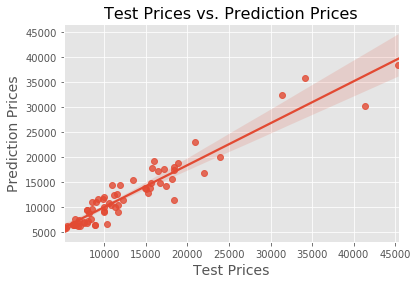

In [70]:
sns.regplot(y_test,y_pred)
plt.xlabel("Test Prices", fontsize=14)
plt.ylabel("Prediction Prices", fontsize=14)
plt.title("Test Prices vs. Prediction Prices", fontsize=16);